In [1]:
%matplotlib inline
import numpy as np
import re

In [2]:
light_instructions = """turn off 660,55 through 986,197
turn off 341,304 through 638,850
turn off 199,133 through 461,193
toggle 322,558 through 977,958
toggle 537,781 through 687,941
turn on 226,196 through 599,390
turn on 240,129 through 703,297
turn on 317,329 through 451,798
turn on 957,736 through 977,890
turn on 263,530 through 559,664
turn on 158,270 through 243,802
toggle 223,39 through 454,511
toggle 544,218 through 979,872
turn on 313,306 through 363,621
toggle 173,401 through 496,407
toggle 333,60 through 748,159
turn off 87,577 through 484,608
turn on 809,648 through 826,999
toggle 352,432 through 628,550
turn off 197,408 through 579,569
turn off 1,629 through 802,633
turn off 61,44 through 567,111
toggle 880,25 through 903,973
turn on 347,123 through 864,746
toggle 728,877 through 996,975
turn on 121,895 through 349,906
turn on 888,547 through 931,628
toggle 398,782 through 834,882
turn on 966,850 through 989,953
turn off 891,543 through 914,991
toggle 908,77 through 916,117
turn on 576,900 through 943,934
turn off 580,170 through 963,206
turn on 184,638 through 192,944
toggle 940,147 through 978,730
turn off 854,56 through 965,591
toggle 717,172 through 947,995
toggle 426,987 through 705,998
turn on 987,157 through 992,278
toggle 995,774 through 997,784
turn off 796,96 through 845,182
turn off 451,87 through 711,655
turn off 380,93 through 968,676
turn on 263,468 through 343,534
turn on 917,936 through 928,959
toggle 478,7 through 573,148
turn off 428,339 through 603,624
turn off 400,880 through 914,953
toggle 679,428 through 752,779
turn off 697,981 through 709,986
toggle 482,566 through 505,725
turn off 956,368 through 993,516
toggle 735,823 through 783,883
turn off 48,487 through 892,496
turn off 116,680 through 564,819
turn on 633,865 through 729,930
turn off 314,618 through 571,922
toggle 138,166 through 936,266
turn on 444,732 through 664,960
turn off 109,337 through 972,497
turn off 51,432 through 77,996
turn off 259,297 through 366,744
toggle 801,130 through 917,544
toggle 767,982 through 847,996
turn on 216,507 through 863,885
turn off 61,441 through 465,731
turn on 849,970 through 944,987
toggle 845,76 through 852,951
toggle 732,615 through 851,936
toggle 251,128 through 454,778
turn on 324,429 through 352,539
toggle 52,450 through 932,863
turn off 449,379 through 789,490
turn on 317,319 through 936,449
toggle 887,670 through 957,838
toggle 671,613 through 856,664
turn off 186,648 through 985,991
turn off 471,689 through 731,717
toggle 91,331 through 750,758
toggle 201,73 through 956,524
toggle 82,614 through 520,686
toggle 84,287 through 467,734
turn off 132,367 through 208,838
toggle 558,684 through 663,920
turn on 237,952 through 265,997
turn on 694,713 through 714,754
turn on 632,523 through 862,827
turn on 918,780 through 948,916
turn on 349,586 through 663,976
toggle 231,29 through 257,589
toggle 886,428 through 902,993
turn on 106,353 through 236,374
turn on 734,577 through 759,684
turn off 347,843 through 696,912
turn on 286,699 through 964,883
turn on 605,875 through 960,987
turn off 328,286 through 869,461
turn off 472,569 through 980,848
toggle 673,573 through 702,884
turn off 398,284 through 738,332
turn on 158,50 through 284,411
turn off 390,284 through 585,663
turn on 156,579 through 646,581
turn on 875,493 through 989,980
toggle 486,391 through 924,539
turn on 236,722 through 272,964
toggle 228,282 through 470,581
toggle 584,389 through 750,761
turn off 899,516 through 900,925
turn on 105,229 through 822,846
turn off 253,77 through 371,877
turn on 826,987 through 906,992
turn off 13,152 through 615,931
turn on 835,320 through 942,399
turn on 463,504 through 536,720
toggle 746,942 through 786,998
turn off 867,333 through 965,403
turn on 591,477 through 743,692
turn off 403,437 through 508,908
turn on 26,723 through 368,814
turn on 409,485 through 799,809
turn on 115,630 through 704,705
turn off 228,183 through 317,220
toggle 300,649 through 382,842
turn off 495,365 through 745,562
turn on 698,346 through 744,873
turn on 822,932 through 951,934
toggle 805,30 through 925,421
toggle 441,152 through 653,274
toggle 160,81 through 257,587
turn off 350,781 through 532,917
toggle 40,583 through 348,636
turn on 280,306 through 483,395
toggle 392,936 through 880,955
toggle 496,591 through 851,934
turn off 780,887 through 946,994
turn off 205,735 through 281,863
toggle 100,876 through 937,915
turn on 392,393 through 702,878
turn on 956,374 through 976,636
toggle 478,262 through 894,775
turn off 279,65 through 451,677
turn on 397,541 through 809,847
turn on 444,291 through 451,586
toggle 721,408 through 861,598
turn on 275,365 through 609,382
turn on 736,24 through 839,72
turn off 86,492 through 582,712
turn on 676,676 through 709,703
turn off 105,710 through 374,817
toggle 328,748 through 845,757
toggle 335,79 through 394,326
toggle 193,157 through 633,885
turn on 227,48 through 769,743
toggle 148,333 through 614,568
toggle 22,30 through 436,263
toggle 547,447 through 688,969
toggle 576,621 through 987,740
turn on 711,334 through 799,515
turn on 541,448 through 654,951
toggle 792,199 through 798,990
turn on 89,956 through 609,960
toggle 724,433 through 929,630
toggle 144,895 through 201,916
toggle 226,730 through 632,871
turn off 760,819 through 828,974
toggle 887,180 through 940,310
toggle 222,327 through 805,590
turn off 630,824 through 885,963
turn on 940,740 through 954,946
turn on 193,373 through 779,515
toggle 304,955 through 469,975
turn off 405,480 through 546,960
turn on 662,123 through 690,669
turn off 615,238 through 750,714
turn on 423,220 through 930,353
turn on 329,769 through 358,970
toggle 590,151 through 704,722
turn off 884,539 through 894,671
toggle 449,241 through 984,549
toggle 449,260 through 496,464
turn off 306,448 through 602,924
turn on 286,805 through 555,901
toggle 722,177 through 922,298
toggle 491,554 through 723,753
turn on 80,849 through 174,996
turn off 296,561 through 530,856
toggle 653,10 through 972,284
toggle 529,236 through 672,614
toggle 791,598 through 989,695
turn on 19,45 through 575,757
toggle 111,55 through 880,871
turn off 197,897 through 943,982
turn on 912,336 through 977,605
toggle 101,221 through 537,450
turn on 101,104 through 969,447
toggle 71,527 through 587,717
toggle 336,445 through 593,889
toggle 214,179 through 575,699
turn on 86,313 through 96,674
toggle 566,427 through 906,888
turn off 641,597 through 850,845
turn on 606,524 through 883,704
turn on 835,775 through 867,887
toggle 547,301 through 897,515
toggle 289,930 through 413,979
turn on 361,122 through 457,226
turn on 162,187 through 374,746
turn on 348,461 through 454,675
turn off 966,532 through 985,537
turn on 172,354 through 630,606
turn off 501,880 through 680,993
turn off 8,70 through 566,592
toggle 433,73 through 690,651
toggle 840,798 through 902,971
toggle 822,204 through 893,760
turn off 453,496 through 649,795
turn off 969,549 through 990,942
turn off 789,28 through 930,267
toggle 880,98 through 932,434
toggle 568,674 through 669,753
turn on 686,228 through 903,271
turn on 263,995 through 478,999
toggle 534,675 through 687,955
turn off 342,434 through 592,986
toggle 404,768 through 677,867
toggle 126,723 through 978,987
toggle 749,675 through 978,959
turn off 445,330 through 446,885
turn off 463,205 through 924,815
turn off 417,430 through 915,472
turn on 544,990 through 912,999
turn off 201,255 through 834,789
turn off 261,142 through 537,862
turn off 562,934 through 832,984
turn off 459,978 through 691,980
turn off 73,911 through 971,972
turn on 560,448 through 723,810
turn on 204,630 through 217,854
turn off 91,259 through 611,607
turn on 877,32 through 978,815
turn off 950,438 through 974,746
toggle 426,30 through 609,917
toggle 696,37 through 859,201
toggle 242,417 through 682,572
turn off 388,401 through 979,528
turn off 79,345 through 848,685
turn off 98,91 through 800,434
toggle 650,700 through 972,843
turn off 530,450 through 538,926
turn on 428,559 through 962,909
turn on 78,138 through 92,940
toggle 194,117 through 867,157
toggle 785,355 through 860,617
turn off 379,441 through 935,708
turn off 605,133 through 644,911
toggle 10,963 through 484,975
turn off 359,988 through 525,991
turn off 509,138 through 787,411
toggle 556,467 through 562,773
turn on 119,486 through 246,900
turn on 445,561 through 794,673
turn off 598,681 through 978,921
turn off 974,230 through 995,641
turn off 760,75 through 800,275
toggle 441,215 through 528,680
turn off 701,636 through 928,877
turn on 165,753 through 202,780
toggle 501,412 through 998,516
toggle 161,105 through 657,395
turn on 113,340 through 472,972
toggle 384,994 through 663,999
turn on 969,994 through 983,997
turn on 519,600 through 750,615
turn off 363,899 through 948,935
turn on 271,845 through 454,882
turn off 376,528 through 779,640
toggle 767,98 through 854,853
toggle 107,322 through 378,688
turn off 235,899 through 818,932
turn on 445,611 through 532,705
toggle 629,387 through 814,577
toggle 112,414 through 387,421
toggle 319,184 through 382,203
turn on 627,796 through 973,940
toggle 602,45 through 763,151
turn off 441,375 through 974,545
toggle 871,952 through 989,998
turn on 717,272 through 850,817
toggle 475,711 through 921,882
toggle 66,191 through 757,481
turn off 50,197 through 733,656
toggle 83,575 through 915,728
turn on 777,812 through 837,912
turn on 20,984 through 571,994
turn off 446,432 through 458,648
turn on 715,871 through 722,890
toggle 424,675 through 740,862
toggle 580,592 through 671,900
toggle 296,687 through 906,775
"""

In [15]:
# star one
lights = np.zeros((1000,1000))
for instr in light_instructions.splitlines():
    command, pos1, pos2 = re.match(r"(.+) (\S+) through (\S+)", instr).groups()
    x1, y1 = map(lambda x: int(x), pos1.split(','))
    x2, y2 = map(lambda x: int(x)+1, pos2.split(','))  # given indices are *inclusive*
    
    slices = np.index_exp[x1:x2, y1:y2]
    
    if command == 'turn on':
        lights[slices] = 1
    elif command == 'turn off':
        lights[slices] = 0
    elif command == 'toggle':
        lights[slices] = 1 - lights[slices]
    else:
        raise NotImplementedError("Unknown command: "+command)
int(lights.sum())

400410

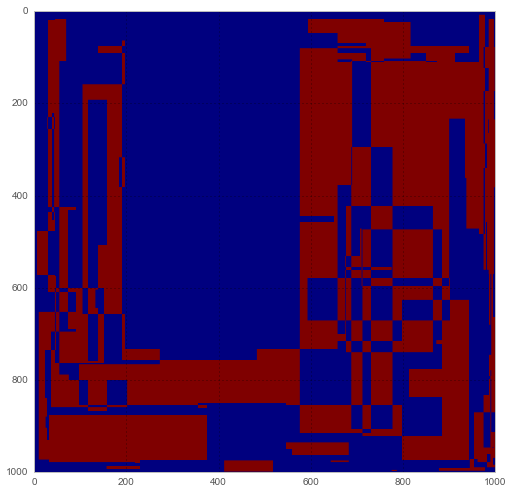

In [16]:
import matplotlib.pyplot as plt
plt.imshow(lights, filterrad=1)

In [19]:
# star two
lights = np.zeros((1000,1000))
for instr in light_instructions.splitlines():
    command, pos1, pos2 = re.match(r"(.+) (\S+) through (\S+)", instr).groups()
    x1, y1 = map(lambda x: int(x), pos1.split(','))
    x2, y2 = map(lambda x: int(x)+1, pos2.split(','))  # given indices are *inclusive*
    
    slices = np.index_exp[x1:x2, y1:y2]
    
    if command == 'turn on':
        lights[slices] += 1
    elif command == 'turn off':
        lights[slices] -= 1
        lights[lights < 0] = 0  # saturate at zero
    elif command == 'toggle':
        lights[slices] += 2
    else:
        raise NotImplementedError("Unknown command: "+command)
int(lights.sum())

15343601

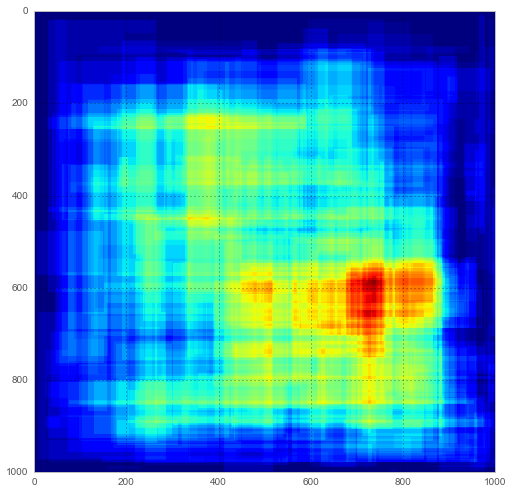

In [20]:
plt.imshow(lights, filterrad=1)